In [ ]:
%pip install torch torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
import torchvision
import torchvision.transforms as transforms
import torch
from torch.utils.data import DataLoader, random_split
import torch.nn as nn

transform = transforms.Compose([transforms.Resize((227,227)), transforms.ToTensor(), transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

train_dataset = torchvision.datasets.CIFAR10(root = 'cifar-10-batches-py' , train = True , transform = transform , download = True)
test_dataset = torchvision.datasets.CIFAR10(root = 'cifar-10-batches-py' , train = False , transform = transform , download = True)

train_size = int(0.9*len(train_dataset))
valid_size = len(train_dataset) - train_size
train_dataset,valid_dataset = random_split(train_dataset, [train_size,valid_size])

100%|██████████| 170498071/170498071 [00:05<00:00, 28744177.97it/s]


Extracting cifar-10-batches-py/cifar-10-python.tar.gz to cifar-10-batches-py
Files already downloaded and verified


In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=64, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_dataset,batch_size=64, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=64, shuffle=False)


In [ ]:
class AlexNet (nn.Module):
    def __init__(self,num_classes):
        super(AlexNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=96, kernel_size=11, stride=4, padding=0),
            nn.BatchNorm2d(96),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )

        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU()
        )

        self.layer4 = nn.Sequential(
            nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU()
        )

        self.layer5 = nn.Sequential(
            nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )

        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(9216, 4096),
            nn.ReLU()
        )

        self.fc2 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU()
        )

        self.fc3 = nn.Sequential(
            nn.Linear(4096, 10)
        )

    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out)
        out = self.fc3(out)
        return out

In [ ]:
num_classes = 10
num_epochs = 30
batch_size = 64
learning_rate = 0.001
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

model = AlexNet(num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,betas = (0.9,0.999), eps = 1e-8 )

total_step = len(train_loader)


Using device: cuda


Epoch [1/30], Train Loss: 2.1709, Train Accuracy: 18.24%, Valid Loss: 1.9622, Valid Accuracy: 24.90%
Epoch [2/30], Train Loss: 1.8976, Train Accuracy: 23.68%, Valid Loss: 1.7948, Valid Accuracy: 33.08%
Epoch [3/30], Train Loss: 1.8351, Train Accuracy: 25.65%, Valid Loss: 1.7585, Valid Accuracy: 33.58%
Epoch [4/30], Train Loss: 1.7704, Train Accuracy: 28.27%, Valid Loss: 1.7152, Valid Accuracy: 31.92%
Epoch [5/30], Train Loss: 1.7115, Train Accuracy: 31.09%, Valid Loss: 1.6622, Valid Accuracy: 34.84%
Epoch [6/30], Train Loss: 1.6328, Train Accuracy: 34.67%, Valid Loss: 1.7128, Valid Accuracy: 36.76%
Epoch [7/30], Train Loss: 1.5780, Train Accuracy: 37.33%, Valid Loss: 1.5620, Valid Accuracy: 40.72%
Epoch [8/30], Train Loss: 1.5272, Train Accuracy: 40.09%, Valid Loss: 1.4948, Valid Accuracy: 43.58%
Epoch [9/30], Train Loss: 1.4356, Train Accuracy: 44.30%, Valid Loss: 1.5607, Valid Accuracy: 44.48%
Epoch [10/30], Train Loss: 1.3307, Train Accuracy: 49.67%, Valid Loss: 1.3829, Valid Accura

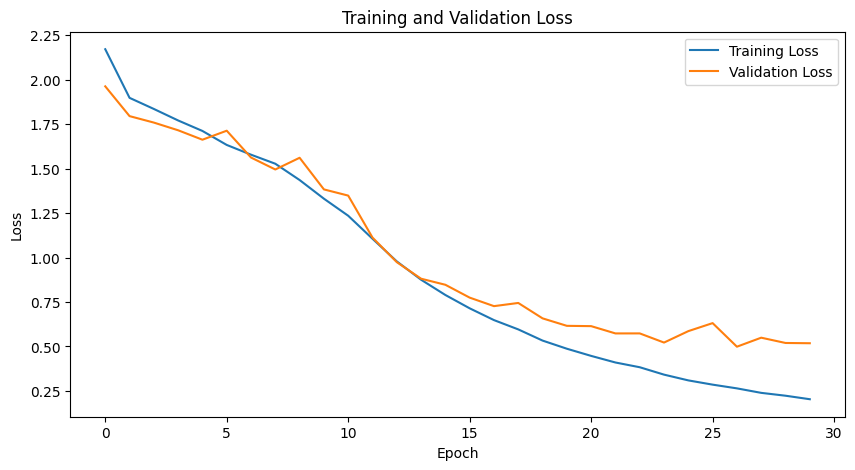

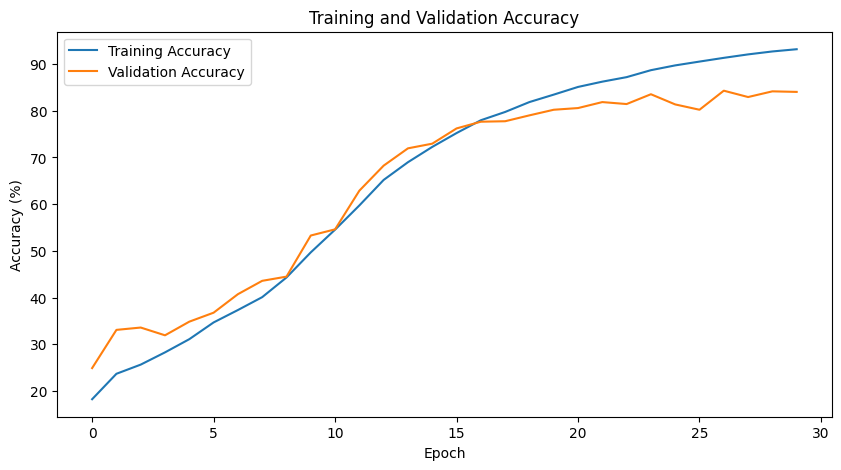

In [ ]:
import matplotlib.pyplot as plt

# Lists to store training and validation loss
train_loss_values = []
valid_loss_values = []

# Lists to store training and validation accuracy
train_accuracy_values = []
valid_accuracy_values = []

for epoch in range(num_epochs):
    train_loss = 0.0
    total_train_correct = 0
    total_train_samples = 0

    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)

        # Calculate training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_train_samples += labels.size(0)
        total_train_correct += (predicted == labels).sum().item()

        #print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
              #.format(epoch+1, num_epochs, i+1, len(train_loader), loss.item(), 100 * total_train_correct / total_train_samples))

    # Average training loss and accuracy for the epoch
    epoch_train_loss = train_loss / len(train_loader.dataset)
    epoch_train_accuracy = 100 * total_train_correct / total_train_samples

    # Validation
    model.eval()
    valid_loss = 0.0
    total_valid_correct = 0
    total_valid_samples = 0

    with torch.no_grad():
        for images, labels in valid_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            valid_loss += loss.item() * images.size(0)

            # Calculate validation accuracy
            _, predicted = torch.max(outputs.data, 1)
            total_valid_samples += labels.size(0)
            total_valid_correct += (predicted == labels).sum().item()

    # Average validation loss and accuracy for the epoch
    epoch_valid_loss = valid_loss / len(valid_loader.dataset)
    epoch_valid_accuracy = 100 * total_valid_correct / total_valid_samples

    print(f'Epoch [{epoch + 1}/{num_epochs}], '
          f'Train Loss: {epoch_train_loss:.4f}, Train Accuracy: {epoch_train_accuracy:.2f}%, '
          f'Valid Loss: {epoch_valid_loss:.4f}, Valid Accuracy: {epoch_valid_accuracy:.2f}%')

    # Append values to lists for plotting
    train_loss_values.append(epoch_train_loss)
    valid_loss_values.append(epoch_valid_loss)
    train_accuracy_values.append(epoch_train_accuracy)
    valid_accuracy_values.append(epoch_valid_accuracy)

    # Set the model back to training mode
    model.train()

# Plotting loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss_values, label='Training Loss')
plt.plot(valid_loss_values, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.savefig('Training_and_Validation_Loss.png')
plt.show()

# Plotting accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy_values, label='Training Accuracy')
plt.plot(valid_accuracy_values, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.savefig('Training_and_Validation_Accuracy.png')
plt.legend()

plt.show()


Accuracy of the network on the 10000 test images: 81.98%


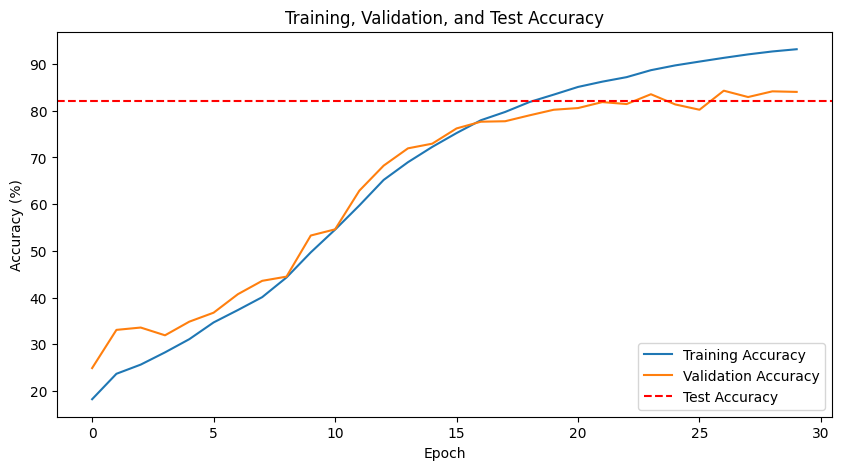

In [ ]:
# Test
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        del images, labels, outputs

print('Accuracy of the network on the {} test images: {:.2f}%'
      .format(total, 100 * correct / total))

# Calculate test accuracy
test_accuracy = 100 * correct / total

# Plotting accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy_values, label='Training Accuracy')
plt.plot(valid_accuracy_values, label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()
plt.savefig('Training_Test_and_Validation_Accuracy.png')
plt.show()
